# **Prevendo a inflação usando dados do IPCA**

Este modelo tem como propósito prever o índice geral do IPCA, e fazer uma comparação entre o dado real e previsto.

O Índice Nacional de Preços ao Consumidor Amplo - IPCA é produzido pelo IBGE desde dezembro de 1979. A partir de novembro de 1985, de acordo com o Decreto n. 91.990, o IPCA passou a ser utilizado como indexador oficial do País, corrigindo salários, aluguéis, taxa de câmbio, poupança, além dos demais ativos monetários.

OBS: A TABELA UTILIZADA CONTÉM DADOS DE 2020 A 2025.

## Importando bibliotecas e base

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
df = pd.read_csv('dados_ipca_transformados.csv', sep=';')

In [4]:
df.head()

,Mês_Ano,Índice geral,Alimentação e bebidas,Habitação,Artigos de residência,Vestuário,Transportes,Saúde e cuidados pessoais,Despesas pessoais,Educação,Comunicação
0,2020-01-01,0.21,0.39,0.55,-0.07,-0.48,0.32,-0.32,0.35,0.16,0.12
1,2020-02-01,0.25,0.11,-0.39,-0.08,-0.73,-0.23,0.73,0.31,3.70,0.21
2,2020-03-01,0.07,1.13,0.13,-1.08,0.21,-0.90,0.21,-0.23,0.59,0.04
3,2020-04-01,-0.31,1.79,-0.10,-1.37,0.10,-2.66,-0.22,-0.14,0.00,-0.20
4,2020-05-01,-0.38,0.24,-0.25,0.58,-0.58,-1.90,-0.10,-0.04,0.02,0.24


In [5]:
df.columns

Index(['Mês_Ano', 'Índice geral', 'Alimentação e bebidas', 'Habitação',
       'Artigos de residência', 'Vestuário', 'Transportes',
       'Saúde e cuidados pessoais', 'Despesas pessoais', 'Educação',
       'Comunicação'],
      dtype='object')

In [6]:
#Verificando se há nulos
df.isnull().sum()

,0
Mês_Ano,0
Índice geral,0
Alimentação e bebidas,0
Habitação,0
Artigos de residência,0
Vestuário,0
Transportes,0
Saúde e cuidados pessoais,0
Despesas pessoais,0
Educação,0


## Análise Exploratória dos Dados

In [ ]:
#Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Índice geral               63 non-null     float64       
 1   Alimentação e bebidas      63 non-null     float64       
 2   Habitação                  63 non-null     float64       
 3   Artigos de residência      63 non-null     float64       
 4   Vestuário                  63 non-null     float64       
 5   Transportes                63 non-null     float64       
 6   Saúde e cuidados pessoais  63 non-null     float64       
 7   Despesas pessoais          63 non-null     float64       
 8   Educação                   63 non-null     float64       
 9   Comunicação                63 non-null     float64       
 10  Ano                        63 non-null     object        
 11  Mes                        63 non-null     object        
 12  Data      

In [ ]:
#Estatísticas
df.describe()

,Índice geral,Alimentação e bebidas,Habitação,Artigos de residência,Vestuário,Transportes,Saúde e cuidados pessoais,Despesas pessoais,Educação,Comunicação,Data
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63
mean,0.492381,0.689206,0.434127,0.429683,0.500635,0.507778,0.475873,0.394286,0.496190,0.155556,2022-08-01 07:37:08.571428608
min,-0.680000,-1.000000,-3.080000,-1.370000,-0.780000,-4.510000,-0.650000,-0.310000,-3.470000,-2.080000,2020-01-01 00:00:00
25%,0.240000,0.255000,0.115000,-0.070000,0.010000,0.070000,0.215000,0.185000,0.045000,-0.080000,2021-04-16 00:00:00
50%,0.470000,0.630000,0.400000,0.480000,0.390000,0.550000,0.430000,0.390000,0.090000,0.120000,2022-08-01 00:00:00
75%,0.830000,1.120000,0.755000,0.860000,0.985000,1.315000,0.740000,0.585000,0.245000,0.315000,2023-11-16 00:00:00
max,1.620000,2.540000,4.440000,1.820000,2.110000,3.810000,1.770000,1.430000,6.280000,2.090000,2025-03-01 00:00:00
std,0.441503,0.760908,1.105522,0.681400,0.711792,1.393563,0.508326,0.321512,1.487907,0.535970,NaN


Text(0.5, 1.0, 'Distribuição do Índice Geral')

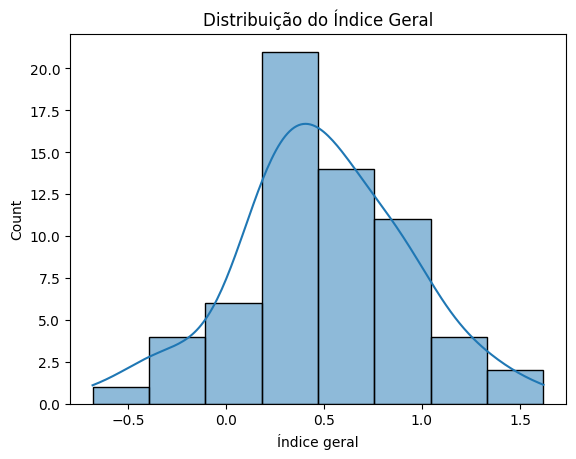

In [ ]:
#Analisando distribuição do índice

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Índice geral'], kde=True)
plt.title('Distribuição do Índice Geral')

Text(0.5, 1.0, 'Matriz de Correlação')

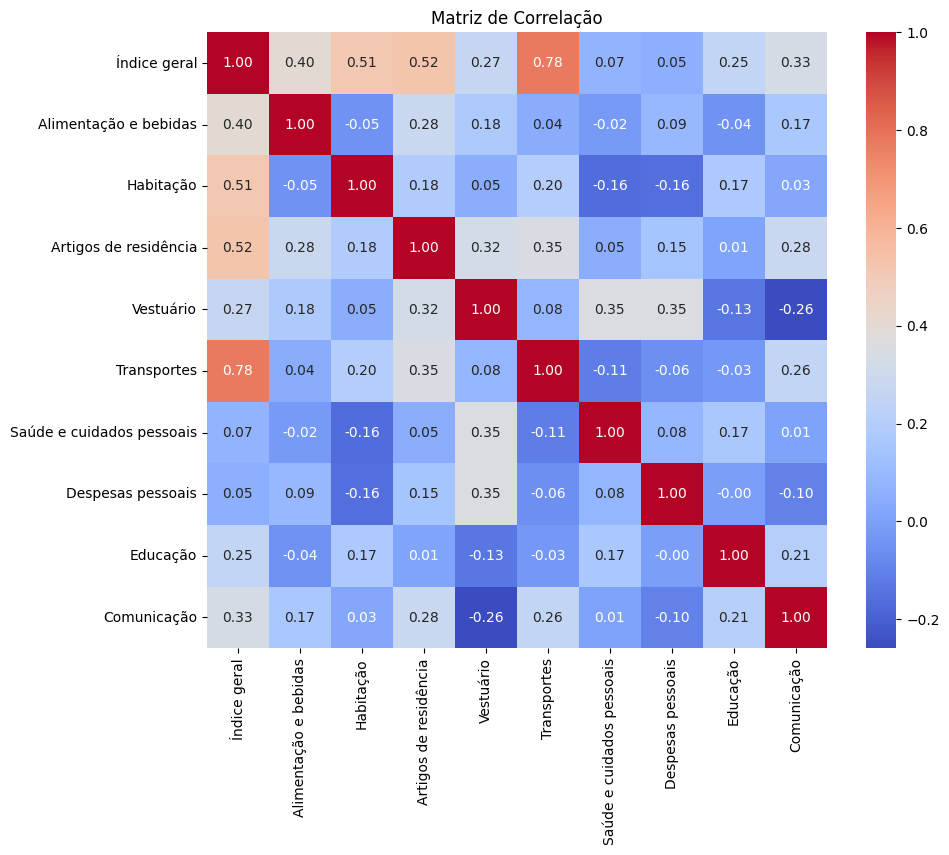

In [ ]:
#Correlação de Pearson entre variáveis numéricas
correlacoes = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')

## Análise de séries temporais

In [ ]:
#Definir índice temporal
df.set_index('Data', inplace=True)

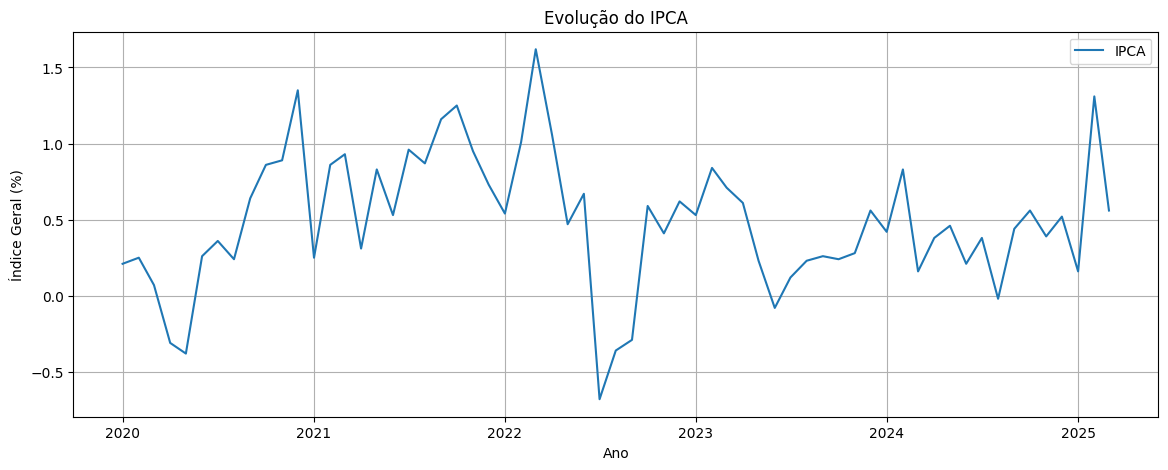

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Índice geral'], label='IPCA')
plt.title('Evolução do IPCA')
plt.ylabel('Índice Geral (%)')
plt.xlabel('Ano')
plt.grid(True)
plt.legend()
plt.show()

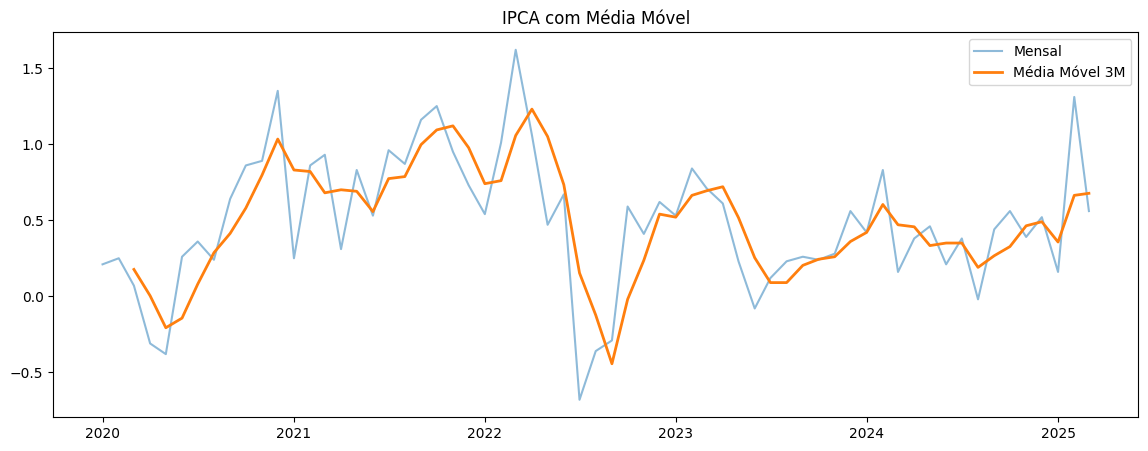

In [ ]:
# Rolling de 3 meses
df['IPCA_MM3'] = df['Índice geral'].rolling(window=3).mean()

plt.figure(figsize=(14, 5))
plt.plot(df['Índice geral'], label='Mensal', alpha=0.5)
plt.plot(df['IPCA_MM3'], label='Média Móvel 3M', linewidth=2)
plt.title('IPCA com Média Móvel')
plt.legend()
plt.show()

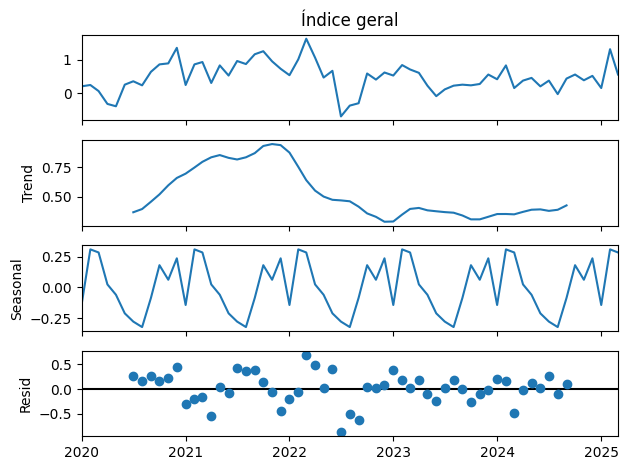

In [ ]:
#Decomposição sazonal
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['Índice geral'], model='additive', period=12)
decomp.plot()
plt.show()

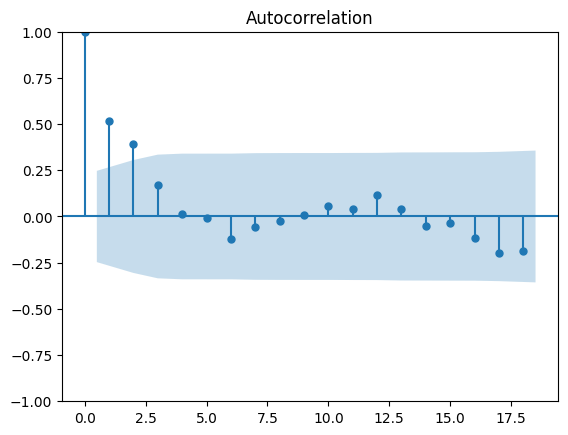

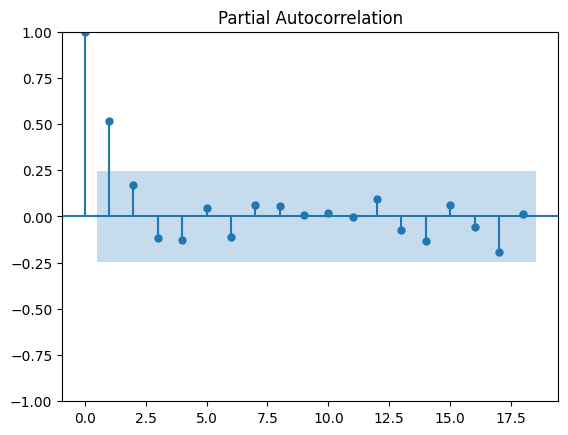

In [ ]:
#Autocorrelação

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Índice geral'])
plot_pacf(df['Índice geral'])
plt.show()

## Modelo de regressão linear

In [ ]:
# Adicionar as variações dos grupos do IPCA como variáveis independentes
variaveis_ipca = [
    'Alimentação e bebidas', 'Habitação', 'Comunicação', 'Educação','Artigos de residência','Vestuário','Transportes','Saúde e cuidados pessoais','Despesas pessoais']

In [ ]:
# Definir variável independente (X) e dependente (y)
X = df[variaveis_ipca]
y = df['Índice geral']

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Calcular métricas de validação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Exibir métricas
print("\n### Métricas do Modelo ###")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Erro Absoluto Médio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")



### Métricas do Modelo ###
Erro Quadrático Médio (MSE): 0.0002
Erro Absoluto Médio (MAE): 0.0119
Coeficiente de Determinação (R²): 0.9984


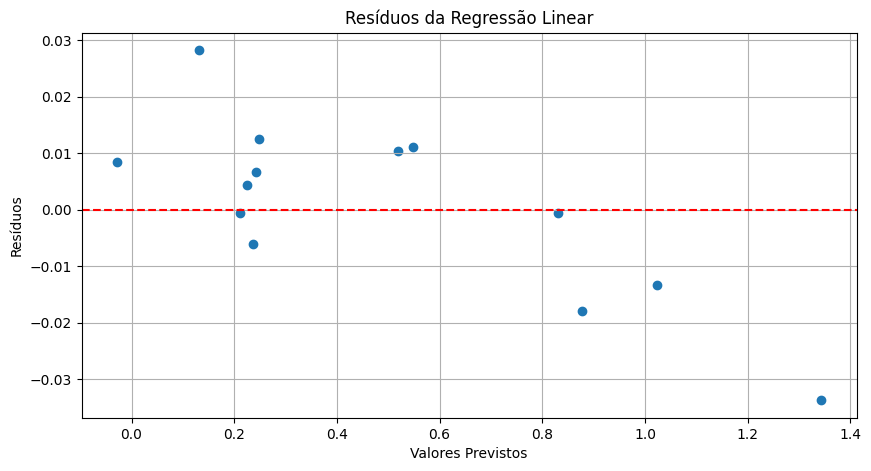

In [ ]:
#Gerar gráfico residual

residuos = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos da Regressão Linear')
plt.grid(True)
plt.show()

In [ ]:
#Tornar a série estacionária Diferenciação, remove a tendência linear
(df['Índice geral'].diff())

,Índice geral
Data,
2020-01-01,NaN
2020-02-01,0.04
2020-03-01,-0.18
2020-04-01,-0.38
2020-05-01,-0.07
...,...
2024-11-01,-0.17
2024-12-01,0.13
2025-01-01,-0.36


In [ ]:
#Verificar se a série é estacionária
from statsmodels.tsa.stattools import adfuller

# Aplicando o teste de Dickey-Fuller
resultado = adfuller(df['Índice geral'])

# Exibir os resultados
print("Teste de Dickey-Fuller Aumentado:")
print(f"Estatística de Teste: {resultado[0]:.4f}")
print(f"P-Valor: {resultado[1]:.4f}")
print("Valores Críticos:")
for key, value in resultado[4].items():
    print(f"  {key}: {value:.4f}")

# Interpretação
if resultado[1] < 0.05:
    print("A série é estacionária!")
else:
    print("A série NÃO é estacionária!")


Teste de Dickey-Fuller Aumentado:
Estatística de Teste: -3.0813
P-Valor: 0.0280
Valores Críticos:
  1%: -3.5424
  5%: -2.9102
  10%: -2.5927
A série é estacionária!


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print(f"R² médio na validação cruzada: {scores.mean():.4f}")


R² médio na validação cruzada: 0.9973



Arquivo 'resultado_previsao_IPCA_sem_data.csv' salvo com sucesso!

### Métricas do Modelo ###
Erro Quadrático Médio (MSE): 0.0002
Erro Absoluto Médio (MAE): 0.0119
Coeficiente de Determinação (R²): 0.9984


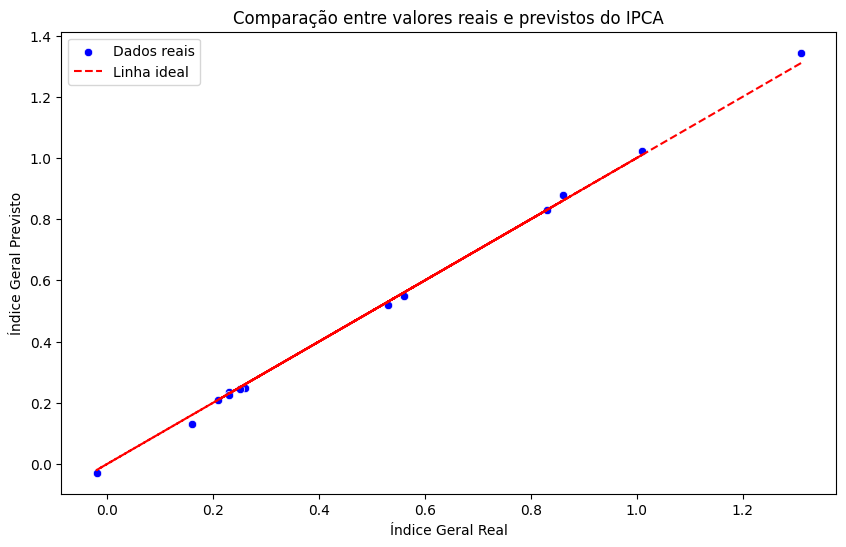

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import adfuller

# Criar o dicionário para converter os meses
mes_map = {
    "jan": "01", "fev": "02", "mar": "03", "abr": "04",
    "mai": "05", "jun": "06", "jul": "07", "ago": "08",
    "set": "09", "out": "10", "nov": "11", "dez": "12"
}

# Carregar os dados
df = pd.read_csv('/content/IPCA_Base.csv', sep=';')

# Separar mês e ano, formatar corretamente
df[['Mês', 'Ano']] = df['Mês_Ano'].str.split('/', expand=True)
df['Mês'] = df['Mês'].map(mes_map)
df['Ano'] = df['Ano'].apply(lambda x: f"20{int(x):02d}")

# Adicionar as variações dos grupos do IPCA como variáveis independentes
variaveis_ipca = [
    'Alimentação e bebidas', 'Habitação', 'Comunicação', 'Educação',
    'Artigos de residência', 'Vestuário', 'Transportes', 'Saúde e cuidados pessoais', 'Despesas pessoais'
]

# Remover valores nulos
df.dropna(subset=['Índice geral'] + variaveis_ipca, inplace=True)

# Definir variável independente (X) e dependente (y)
X = df[variaveis_ipca]
y = df['Índice geral']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Calcular métricas de validação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Criar tabela com resultados SEM a coluna "Data"
resultado_df = pd.DataFrame({
    'Índice geral Real': y_test,
    'Índice geral Previsto': y_pred
})

# Salvar resultados em um arquivo CSV
resultado_df.to_csv("resultado_previsao_IPCA_sem_data.csv", index=False, sep=";")
print("\nArquivo 'resultado_previsao_IPCA_sem_data.csv' salvo com sucesso!")

# Exibir métricas
print("\n### Métricas do Modelo ###")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Erro Absoluto Médio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# Visualizar os resultados em gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Dados reais')
plt.plot(y_test, y_test, color='red', linestyle="dashed", label='Linha ideal')
plt.xlabel("Índice Geral Real")
plt.ylabel("Índice Geral Previsto")
plt.legend()
plt.title("Comparação entre valores reais e previstos do IPCA")
plt.show()